In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# uploaded = files.upload()


In [2]:
!cp hinh4.png "/content/drive/MyDrive/IP_2025/TieuLuan2/"


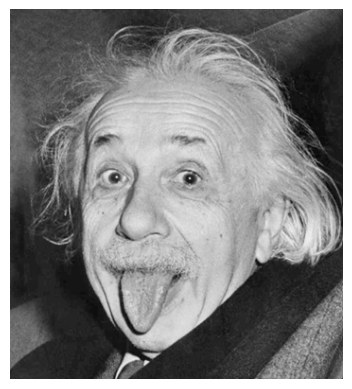

In [3]:
# img=cv2.imread('/content/drive/MyDrive/IP_2025/TieuLuan2/hinh4.png')
img = cv2.imread('hinh4.png')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
def sharpen_laplacian(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    sharpen = cv2.convertScaleAbs(img.astype(np.float64) - 0.7*laplacian)

    if len(img.shape) == 2:  # grayscale
        equalized = cv2.equalizeHist(sharpen)
    else:
        ycrcb = cv2.cvtColor(sharpen, cv2.COLOR_BGR2YCrCb)
        y, cr, cb = cv2.split(ycrcb)
        y_eq = cv2.equalizeHist(y)
        ycrcb_eq = cv2.merge((y_eq, cr, cb))
        equalized = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    return sharpen, equalized


In [5]:
def unsharp_masking(img):
    blur = cv2.GaussianBlur(img, (5,5), 0)
    unsharp = cv2.addWeighted(img, 2, blur, -1, 0)
    unsharp = cv2.convertScaleAbs(unsharp)  # ép kiểu về uint8 để hiển thị và equalize

    if len(img.shape) == 2:
        equalized = cv2.equalizeHist(unsharp)
    else:
        # Trường hợp ảnh màu
        ycrcb = cv2.cvtColor(unsharp, cv2.COLOR_BGR2YCrCb)
        y, cr, cb = cv2.split(ycrcb)
        y_eq = cv2.equalizeHist(y)
        ycrcb_eq = cv2.merge((y_eq, cr, cb))
        equalized = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

    return unsharp, equalized


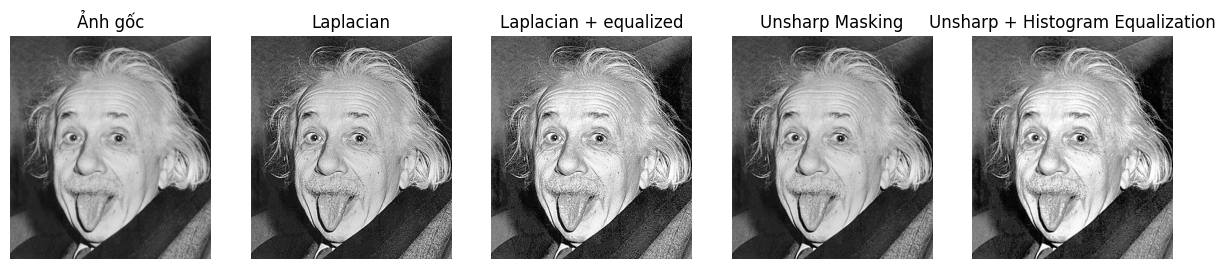

In [6]:
def show_images(images, titles):
    plt.figure(figsize=(15,5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis("off")

sharpened, equalized_laplacian = sharpen_laplacian(img)
unsharp, equalized_unsharp = unsharp_masking(img)

show_images(
    [img, sharpened,equalized_laplacian, unsharp, equalized_unsharp],
    ["Ảnh gốc", "Laplacian",'Laplacian + equalized', "Unsharp Masking", "Unsharp + Histogram Equalization"]
)

